<a href="https://colab.research.google.com/github/pdpavandesai/MergingDiabetesData/blob/main/MergedDatasetPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving FineTuned_MergedDatasetForDiabetes.csv to FineTuned_MergedDatasetForDiabetes.csv


In [3]:
mg_DS_Actual = pd.read_csv(io.BytesIO(uploaded['FineTuned_MergedDatasetForDiabetes.csv']))
mg_DS_Actual_Copy = mg_DS_Actual.copy()

In [4]:
mg_DS_Actual_Copy.head(15)

,Age,BMI,Gender,HighChol,HighBP,Smoker,HvyAlcoholConsump,HeartDisease,HbA1cLevel,BloodGlucoseLevel,Diabetes
0,9,40.0,0,1.0,1,1,0.0,NaN,NaN,NaN,0
1,7,25.0,0,0.0,0,1,0.0,NaN,NaN,NaN,0
2,9,28.0,0,1.0,1,0,0.0,NaN,NaN,NaN,0
3,11,27.0,0,0.0,1,0,0.0,NaN,NaN,NaN,0
4,11,24.0,0,1.0,1,0,0.0,NaN,NaN,NaN,0
5,10,25.0,1,1.0,1,1,0.0,NaN,NaN,NaN,0
6,9,30.0,0,0.0,1,1,0.0,NaN,NaN,NaN,0
7,11,25.0,0,1.0,1,1,0.0,NaN,NaN,NaN,0
8,9,30.0,0,1.0,1,1,0.0,NaN,NaN,NaN,2
9,8,24.0,1,0.0,0,0,0.0,NaN,NaN,NaN,0


In [5]:
print('==========Info==========')
print(mg_DS_Actual_Copy.info())
print('')
print('==========Check for number of null Values==========')
print(mg_DS_Actual_Copy.isnull().sum())
print('')
print('==========Finding no.of Unique values in each column==========')
print(mg_DS_Actual_Copy.nunique())
print('')
print('==========Description of dataset==========')
print(mg_DS_Actual_Copy.describe())

==========Info==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282675 entries, 0 to 282674
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                282675 non-null  int64  
 1   BMI                282675 non-null  float64
 2   Gender             282675 non-null  int64  
 3   HighChol           229781 non-null  float64
 4   HighBP             282675 non-null  int64  
 5   Smoker             282675 non-null  int64  
 6   HvyAlcoholConsump  229781 non-null  float64
 7   HeartDisease       52894 non-null   float64
 8   HbA1cLevel         52894 non-null   float64
 9   BloodGlucoseLevel  52894 non-null   float64
 10  Diabetes           282675 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 23.7 MB
None

==========Check for number of null Values==========
Age                       0
BMI                       0
Gender                    0
HighChol              52894
HighBP

In [7]:
imp_mean = IterativeImputer(estimator=RandomForestRegressor(),random_state=0)
imp_mean.fit(mg_DS_Actual_Copy)
fineTuned_merged_dataset = (pd.DataFrame(imp_mean.transform(mg_DS_Actual_Copy)))
fineTuned_merged_dataset.head()
# display(pd.DataFrame(imp_mean.transform(mg_DS_Actual_Copy)))
print(mg_DS_Actual_Copy.isnull().sum())

Age                       0
BMI                       0
Gender                    0
HighChol              52894
HighBP                    0
Smoker                    0
HvyAlcoholConsump     52894
HeartDisease         229781
HbA1cLevel           229781
BloodGlucoseLevel    229781
Diabetes                  0
dtype: int64


In [8]:
print(fineTuned_merged_dataset.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64


In [9]:
fineTuned_merged_dataset.head(15)

,0,1,2,3,4,5,6,7,8,9,10
0,9.0,40.0,0.0,1.0,1.0,1.0,0.0,0.00,6.133000,164.090000,0.0
1,7.0,25.0,0.0,0.0,0.0,1.0,0.0,0.00,5.784000,112.700000,0.0
2,9.0,28.0,0.0,1.0,1.0,0.0,0.0,0.00,6.380667,159.378833,0.0
3,11.0,27.0,0.0,0.0,1.0,0.0,0.0,0.00,5.474000,104.190000,0.0
4,11.0,24.0,0.0,1.0,1.0,0.0,0.0,1.00,5.430333,110.040000,0.0
5,10.0,25.0,1.0,1.0,1.0,1.0,0.0,1.00,4.694000,107.150000,0.0
6,9.0,30.0,0.0,0.0,1.0,1.0,0.0,0.00,5.100000,108.415000,0.0
7,11.0,25.0,0.0,1.0,1.0,1.0,0.0,1.00,5.254500,103.510000,0.0
8,9.0,30.0,0.0,1.0,1.0,1.0,0.0,0.00,6.683000,159.520000,2.0
9,8.0,24.0,1.0,0.0,0.0,0.0,0.0,0.00,5.801000,96.030000,0.0


In [10]:
fineTuned_merged_dataset.to_csv('FT_Merged_dataset_PostOutlier_Treatment.csv')

In [14]:
from google.colab import files
uploaded = files.upload()

Saving FT_Merged_dataset_PostOutlier_Treatment.csv to FT_Merged_dataset_PostOutlier_Treatment (1).csv


In [20]:
fmds_train = pd.read_csv(io.BytesIO(uploaded['FT_Merged_dataset_PostOutlier_Treatment (1).csv']))
fmds_train_copy = fmds_train.copy()

In [21]:
fmds_train_copy.head()

,Age,BMI,Gender,HighChol,HighBP,Smoker,HvyAlcoholConsump,HeartDisease,HbA1cLevel,BloodGlucoseLevel,Diabetes
0,9,40.0,0,1.0,1,1,0.0,0.0,6.133000,164.090000,0
1,7,25.0,0,0.0,0,1,0.0,0.0,5.784000,112.700000,0
2,9,28.0,0,1.0,1,0,0.0,0.0,6.380667,159.378833,0
3,11,27.0,0,0.0,1,0,0.0,0.0,5.474000,104.190000,0
4,11,24.0,0,1.0,1,0,0.0,1.0,5.430333,110.040000,0


Text(0.5, 1.0, 'Distribution of Diabetes w.r.t Age & BMI')

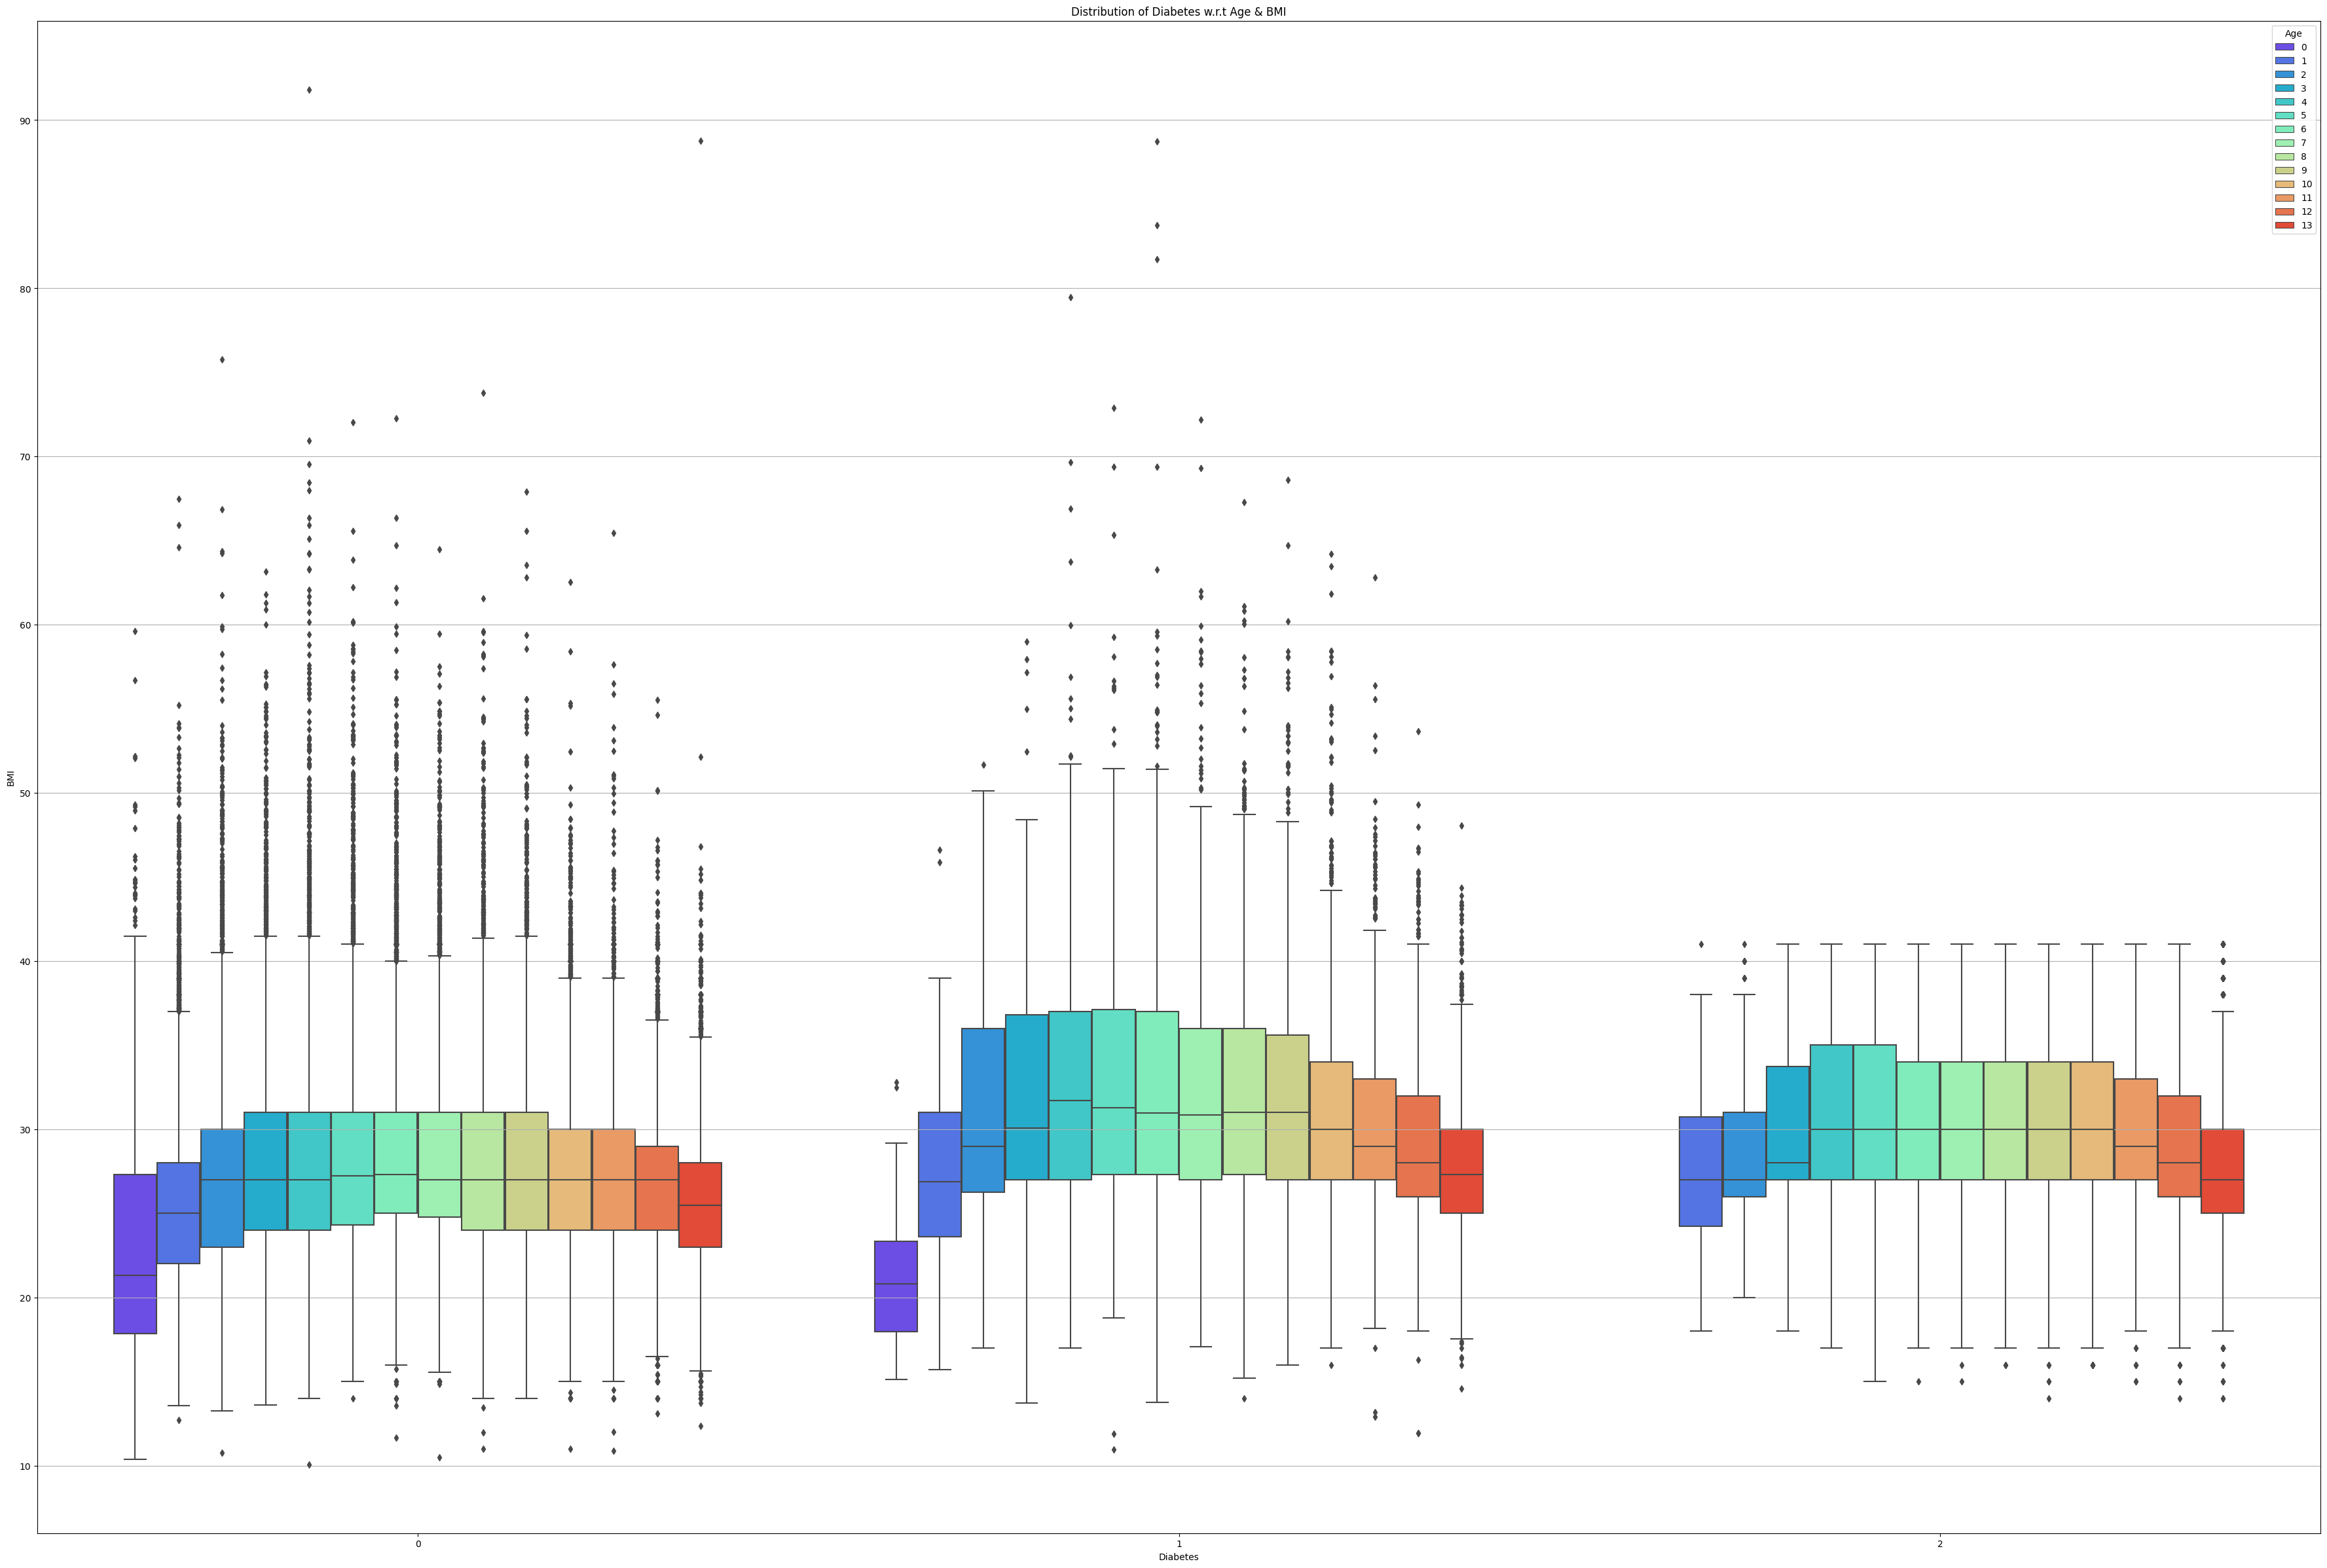

In [22]:
plt.figure(figsize=(45,30))
sns.boxplot(data=fmds_train_copy,x='Diabetes',y='BMI',hue='Age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & BMI')

In [23]:
fmds_train_copy1 = fmds_train.copy()

In [ ]:
for i in fmds_train_copy1['Age']:
  q1 = fmds_train_copy1['Age'].quantile(0.25)
  q3 = fmds_train_copy1['Age'].quantile(0.75)
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  if i > Upper_tail or i < Lower_tail:
    fmds_train_copy1['Age'] = fmds_train_copy1['Age']. replace (i, np.median(fmds_train_copy1['Age']))

sns.boxplot (fmds_train_copy1['Age'])
plt.title("Box Plot after Median value imputation")
plt.show()

In [ ]:
plt.figure(figsize=(45,30))
sns.boxplot(data=fmds_train_copy1,x='Diabetes',y='BMI',hue='Age',palette='rainbow').yaxis.grid(True)
plt.title('Distribution of Diabetes w.r.t Age & BMI')

In [13]:
y = fmds_train_copy.Diabetes
X = fmds_train_copy.drop(['Diabetes'], axis=1)
print(X)
print(y)

SyntaxError: ignored

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.1, random_state=1)
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((254407, 10), (254407,), (28268, 10), (28268,))

In [ ]:
GBR = GradientBoostingRegressor(random_state=1, n_estimators=1000, max_depth=10).fit(X_train,y_train)
print(GBR.score(X_train,y_train))

ValueError: ignored

In [ ]:
GBR_pred = GBR.predict(X_val)
print(GBR_pred)
rms = mean_squared_error(y_val,GBR_pred,squared=True)
print(rms)

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_val,GBR_pred,c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(GBR_pred), max(y_val))
p2 = min(min(GBR_pred), min(y_val))
plt.plot([p1,p2],[p1,p2],'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.xlabel('Prediction', fontsize=15)
plt.axis('equal')
plt.show()